In [1]:
# I started by importing most of the packages I would need to complete my analysis.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
#Then I used pandas to import the datasets I had scraped from the web.

dow_jones = pd.read_csv(r'C:\Users\jcfur\Documents\Web Scraping\dow_jones.csv')
print(dow_jones.info())    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  53 non-null     int64 
 1   AverageClosing Price  53 non-null     object
 2   Year Open             53 non-null     object
 3   Year High             53 non-null     object
 4   Year Low              53 non-null     object
 5   Year Close            53 non-null     object
 6   Annual% Change        53 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.0+ KB
None


In [5]:
gold_prices = pd.read_csv(r'C:\Users\jcfur\Documents\Web Scraping\gold_prices.csv')
print(gold_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Year                  53 non-null     int64 
 1   AverageClosing Price  53 non-null     object
 2   Year Open             53 non-null     object
 3   Year High             53 non-null     object
 4   Year Low              53 non-null     object
 5   Year Close            53 non-null     object
 6   Annual% Change        53 non-null     object
dtypes: int64(1), object(6)
memory usage: 3.0+ KB
None


In [16]:
# Recognizing that the misclassification of the data as objects due to the presence of dollar signs would make analysis 
# extremely difficult, I created a function titled "fix_currency" which eliminates the dollar signs and any commas by 
# iterating over them. I then applied this function to the average closing price in both datasets.

def fix_currency(x):
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)

gold_prices['AverageClosing Price'] = gold_prices['AverageClosing Price'].apply(fix_currency).astype('float')

print(gold_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  53 non-null     int64  
 1   AverageClosing Price  53 non-null     float64
 2   Year Open             53 non-null     object 
 3   Year High             53 non-null     object 
 4   Year Low              53 non-null     object 
 5   Year Close            53 non-null     object 
 6   Annual% Change        53 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.0+ KB
None


In [18]:
dow_jones['AverageClosing Price'] = dow_jones['AverageClosing Price'].apply(fix_currency).astype('float')

print(dow_jones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  53 non-null     int64  
 1   AverageClosing Price  53 non-null     float64
 2   Year Open             53 non-null     object 
 3   Year High             53 non-null     object 
 4   Year Low              53 non-null     object 
 5   Year Close            53 non-null     object 
 6   Annual% Change        53 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 3.0+ KB
None


In [22]:
# Next, I removed the columns with data I did not intend to use.

dow_jones = dow_jones.iloc[:, 0:2]
print(dow_jones)

    Year  AverageClosing Price
0   2021              32711.65
1   2020              26890.67
2   2019              26379.55
3   2018              25046.86
4   2017              21750.20
5   2016              17927.11
6   2015              17587.03
7   2014              16777.69
8   2013              15009.52
9   2012              12966.44
10  2011              11957.57
11  2010              10668.58
12  2009               8885.65
13  2008              11244.06
14  2007              13178.26
15  2006              11409.78
16  2005              10546.66
17  2004              10315.51
18  2003               9006.64
19  2002               9214.85
20  2001              10199.29
21  2000              10729.38
22  1999              10481.56
23  1998               8630.76
24  1997               7447.01
25  1996               5739.63
26  1995               4494.28
27  1994               3794.22
28  1993               3524.92
29  1992               3284.08
30  1991               2929.04
31  1990

In [23]:
gold_prices = gold_prices.iloc[:, 0:2]
print(gold_prices)

    Year  AverageClosing Price
0   2021               1805.48
1   2020               1773.73
2   2019               1393.34
3   2018               1268.93
4   2017               1260.39
5   2016               1251.92
6   2015               1158.86
7   2014               1266.06
8   2013               1409.51
9   2012               1668.86
10  2011               1573.16
11  2010               1226.66
12  2009                973.66
13  2008                872.37
14  2007                696.43
15  2006                604.34
16  2005                444.99
17  2004                409.53
18  2003                363.83
19  2002                310.08
20  2001                271.19
21  2000                279.29
22  1999                278.86
23  1998                294.12
24  1997                331.00
25  1996                387.73
26  1995                384.07
27  1994                384.16
28  1993                360.05
29  1992                343.87
30  1991                362.34
31  1990

In [76]:
# I performed an inner join on the "Year" column in order to simplify data visualizations later on.

dow_and_gold_unmodified = dow_jones.merge(gold_prices, on='Year', suffixes=('_dow', '_gold'))
dow_and_gold_unmodified.head()

,Year,AverageClosing Price_dow,AverageClosing Price_gold
0,2021,32711.65,1805.48
1,2020,26890.67,1773.73
2,2019,26379.55,1393.34
3,2018,25046.86,1268.93
4,2017,21750.20,1260.39


In [75]:
# I imported a csv with annual conversion values to 1800 USD from https://www.officialdata.org/us/inflation/1800?amount=1#citation
# so that I could modify the datasets to be in-line with modern-day inflation rates.

inflation = pd.read_csv(r'C:\Users\jcfur\Documents\Web Scraping\inflation_data.csv')
inflation.head()

,Year,amount
0,1800,1.00
1,1801,1.01
2,1802,0.85
3,1803,0.90
4,1804,0.94


In [88]:
# Then I conducted another inner join to merge the inflation rate column, listed as "amount", with the rest of the DataFrame.

dow_and_gold = dow_and_gold_unmodified.merge(inflation, on='Year')
dow_and_gold.info()
dow_and_gold.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 52
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       53 non-null     int64  
 1   AverageClosing Price_dow   53 non-null     float64
 2   AverageClosing Price_gold  53 non-null     float64
 3   amount                     53 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 2.1 KB


,Year,AverageClosing Price_dow,AverageClosing Price_gold,amount
0,2021,32711.65,1805.48,21.36
1,2020,26890.67,1773.73,20.54
2,2019,26379.55,1393.34,20.29
3,2018,25046.86,1268.93,19.94
4,2017,21750.20,1260.39,19.45


In [89]:
# To convert all the values to 2021 USD, I first divided the Dow Jones price by the conversion rate to 1800 USD. Then I
# multiplied the output by 21.36, which was the conversion rate of 1800 USD to 2021 USD according to the table. I saved the
# resulting column as "2021_dow".

dow_and_gold['2021_dow'] = (dow_and_gold['AverageClosing Price_dow'] / dow_and_gold['amount']) * 21.36
dow_and_gold.head()

,Year,AverageClosing Price_dow,AverageClosing Price_gold,amount,2021_dow
0,2021,32711.65,1805.48,21.36,32711.650000
1,2020,26890.67,1773.73,20.54,27964.202103
2,2019,26379.55,1393.34,20.29,27770.684475
3,2018,25046.86,1268.93,19.94,26830.538094
4,2017,21750.20,1260.39,19.45,23886.080823


In [90]:
# I then repeated the previous step for gold prices, saving the resulting column as "2021_gold".

dow_and_gold['2021_gold'] = (dow_and_gold_interim['AverageClosing Price_gold'] / dow_and_gold['amount']) * 21.36
dow_and_gold.head()

,Year,AverageClosing Price_dow,AverageClosing Price_gold,amount,2021_dow,2021_gold
0,2021,32711.65,1805.48,21.36,32711.650000,1805.480000
1,2020,26890.67,1773.73,20.54,27964.202103,1844.541032
2,2019,26379.55,1393.34,20.29,27770.684475,1466.818255
3,2018,25046.86,1268.93,19.94,26830.538094,1359.295125
4,2017,21750.20,1260.39,19.45,23886.080823,1384.160946


Text(0.5, 1.0, 'Gold Prices Compared to the Dow Jones Industrial Average in 2021 USD')

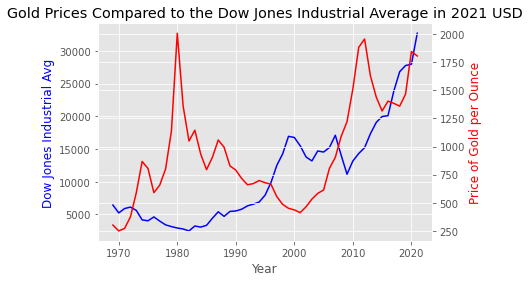

In [92]:
# To begin my analysis now that the data was prepared, I created a line graph with the data from both the "2021_dow" and
# "2021_gold" columns displayed. I also used multiple axis in order to assist in seeing any relationship, as the price of
# the Dow is much more than the price of gold per ounce. Unfortunately, this graph is not very conclusive.

fig, ax = plt.subplots()
ax.plot(dow_and_gold['Year'], dow_and_gold['2021_dow'], color='b', label='Dow Jones Stock Index')
ax2 = ax.twinx()
ax2.plot(dow_and_gold['Year'], dow_and_gold['2021_gold'], color='r', label='Gold Prices')
ax.set_ylabel('Dow Jones Industrial Avg', color='b')
ax2.set_ylabel('Price of Gold per Ounce', color='r')
ax.set_xlabel('Year')
plt.style.use('ggplot')
plt.title('Gold Prices Compared to the Dow Jones Industrial Average in 2021 USD')

In [93]:
# I conducted a test to get the Pearson’s correlation coefficient of the "2021_dow" and "2021_gold" columns. This had an
# unexpected positive result.

from scipy.stats import pearsonr
corr, _ = pearsonr(dow_and_gold['2021_dow'], dow_and_gold['2021_gold'])
print(corr)

0.41815983627044084


In [102]:
# Because of the unexpected positive result during the Pearson’s correlation coefficient test, I decided to break the data
# down by decade to conduct a more detailed analysis, but kept the 21st century together as, based on the line chart above,
# the data appeared to not fluctuate much during those two decades.

twenty_first=dow_and_gold.iloc[0:22]
twenty_first.head()

,Year,AverageClosing Price_dow,AverageClosing Price_gold,amount,2021_dow,2021_gold
0,2021,32711.65,1805.48,21.36,32711.650000,1805.480000
1,2020,26890.67,1773.73,20.54,27964.202103,1844.541032
2,2019,26379.55,1393.34,20.29,27770.684475,1466.818255
3,2018,25046.86,1268.93,19.94,26830.538094,1359.295125
4,2017,21750.20,1260.39,19.45,23886.080823,1384.160946


In [105]:
nineties=dow_and_gold.iloc[22:32]
nineties.head()

,Year,AverageClosing Price_dow,AverageClosing Price_gold,amount,2021_dow,2021_gold
22,1999,10481.56,278.86,13.22,16935.410106,450.563510
23,1998,8630.76,294.12,12.94,14246.756847,485.502566
24,1997,7447.01,331.00,12.74,12485.724772,554.957614
25,1996,5739.63,387.73,12.45,9847.268819,665.213880
26,1995,4494.28,384.07,12.10,7933.704198,677.994645


In [106]:
eighties=dow_and_gold.iloc[32:42]
eighties.head()

,Year,AverageClosing Price_dow,AverageClosing Price_gold,amount,2021_dow,2021_gold
32,1989,2510.33,381.27,9.84,5449.252927,827.634878
33,1988,2061.48,436.78,9.39,4689.373035,993.569840
34,1987,2277.53,446.84,9.02,5393.352639,1058.148825
35,1986,1793.10,368.20,8.70,4402.369655,903.994483
36,1985,1327.99,317.42,8.54,3321.530023,793.921686


In [107]:
seventies=dow_and_gold.iloc[42:52]
seventies.head()

,Year,AverageClosing Price_dow,AverageClosing Price_gold,amount,2021_dow,2021_gold
42,1979,844.38,307.01,5.76,3131.242500,1138.495417
43,1978,821.13,193.57,5.17,3392.521625,799.739884
44,1977,894.37,147.84,4.81,3971.672183,656.520249
45,1976,975.20,124.80,4.52,4608.467257,589.762832
46,1975,802.89,160.87,4.27,4016.330304,804.726745


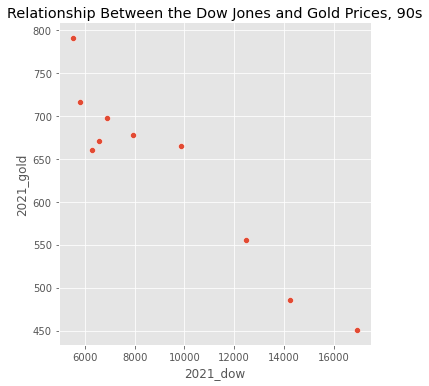

In [129]:
# To begin to get an understanding of the data by decade, I set up a scatterplot of the "2021_dow" and "2021_gold" columns for
# the 1990's, which appears to show a strong negative correlation between the two variables.

sns.relplot(x="2021_dow", y="2021_gold", 
                data=nineties, kind='scatter').set(title='Relationship Between the Dow Jones and Gold Prices, 90s')

Text(0.5, 1.0, '80s Gold Prices Compared to the Dow Jones Industrial Average in 2021 USD')

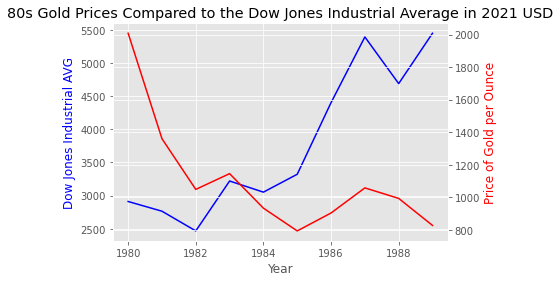

In [115]:
# Next I made a line plot out of the 1980's data, which seemed somewhat distinct on the previous line graph. The correlation
# here and in the scatterplot that follows is less clear than the 1990's data.

fig, ax = plt.subplots()
ax.plot(eighties['Year'], eighties['2021_dow'], color='b', label='Dow Jones Stock Index')
ax2 = ax.twinx()
ax2.plot(eighties['Year'], eighties['2021_gold'], color='r', label='Gold Prices')
ax.set_ylabel('Dow Jones Industrial AVG', color='b')
ax2.set_ylabel('Price of Gold per Ounce', color='r')
ax.set_xlabel('Year')
plt.style.use('ggplot')
plt.title('80s Gold Prices Compared to the Dow Jones Industrial Average in 2021 USD')

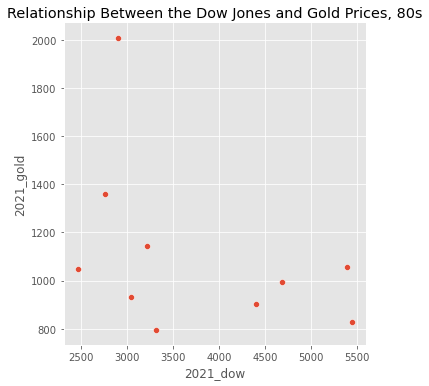

In [121]:
sns.relplot(x="2021_dow", y="2021_gold", 
                data=eighties, kind='scatter').set(title='Relationship Between the Dow Jones and Gold Prices, 80s')

Text(0.5, 1.0, '70s Gold Prices Compared to the Dow Jones Industrial Average in 2021 USD')

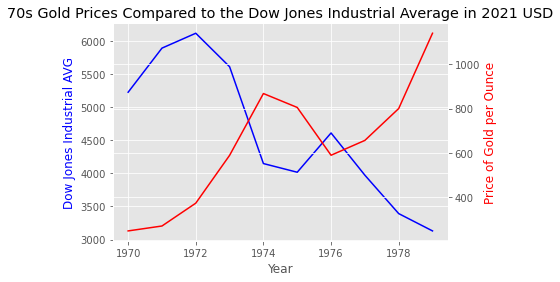

In [117]:
# The line chart for the 1970's strongly suggests a negative correlation between the two variables, though the scatterplot
# indicates that it may be weaker than the 1990's.

fig, ax = plt.subplots()
ax.plot(seventies['Year'], seventies['2021_dow'], color='b', label='Dow Jones Stock Index')
ax2 = ax.twinx()
ax2.plot(seventies['Year'], seventies['2021_gold'], color='r', label='Gold Prices')
ax.set_ylabel('Dow Jones Industrial AVG', color='b')
ax2.set_ylabel('Price of Gold per Ounce', color='r')
ax.set_xlabel('Year')
plt.style.use('ggplot')
plt.title('70s Gold Prices Compared to the Dow Jones Industrial Average in 2021 USD')

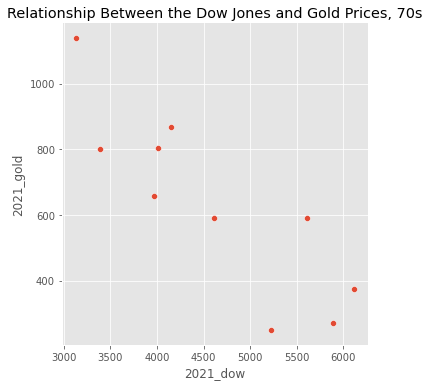

In [119]:
sns.relplot(x="2021_dow", y="2021_gold", 
                data=seventies, kind='scatter').set(title='Relationship Between the Dow Jones and Gold Prices, 70s')

In [126]:
# To get a more accurate picture of the degree of correlation between the Dow Jones average annual price and the average 
# annual price of gold, I conducted a Pearson’s correlation coefficient test for each decade. This yielded strong negative
# correlations for the 1990's and 1970's, though only a moderate negative correlation for the 1980's.

corr90, _ = pearsonr(nineties['2021_dow'], nineties['2021_gold'])
corr80, _ = pearsonr(eighties['2021_dow'], eighties['2021_gold'])
corr70, _ = pearsonr(seventies['2021_dow'], seventies['2021_gold'])
print(corr90, corr80, corr70)

-0.9495233857706128 -0.41716212622037496 -0.8651814577399296


In [127]:
# To check the statistical significance of my findings, I performed a two tail T test for the 1990's, 80's, and 70's data.
# All were statistically significant, with P-Values well under .05.

from scipy import stats
ttest1 = stats.ttest_rel(nineties['2021_dow'], nineties['2021_gold'])
ttest2 = stats.ttest_rel(eighties['2021_dow'], eighties['2021_gold'])
ttest3 = stats.ttest_rel(seventies['2021_dow'], seventies['2021_gold'])
print(ttest1, ttest2, ttest3)

Ttest_relResult(statistic=6.643115528281589, pvalue=9.448045416383029e-05) Ttest_relResult(statistic=6.451190079950108, pvalue=0.00011797737526280001) Ttest_relResult(statistic=9.663884140675965, pvalue=4.752684284246929e-06)


In [128]:
# Finally, I analyzed the data from the 21st century, which had a moderate positive correlation that was statistically 
# significant. This is what likely led to the unexpected positive correlation when the whole dataset was analyzed earlier.

corr20, _ = pearsonr(twenty_first['2021_dow'], twenty_first['2021_gold'])
ttest4 = stats.ttest_rel(twenty_first['2021_dow'], twenty_first['2021_gold'])
print(corr20, ttest4)

0.47662405032996713 Ttest_relResult(statistic=14.34413230921181, pvalue=2.5399793845450446e-12)


In [ ]:
# Conclusion- The data suggests there is a historic negative correlation between gold prices and the price of the Dow Jones 
# stock index, which is in-line with the general understanding that gold prices increase during economic recessions, as it
# is seen as a safe asset. However, that relationship appears to have broken down since the year 2000. There are many possible
# reasons for this, such as the increasing use of gold to manufacture microchips, a rapidly growing economic sector over the
# past 20 years. However, confirming the cause will require additional data on what gold is being used for. Based on the data
# I have analyzed, all that is apparent is that the traditional negative relationship between stock prices and gold prices
# appears to have eroded, with the latter now behaving more like many other traditional industrial pre-cursors and having a
# positive correlation with stock prices.